In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import numpy as np

Use the CPI growth rate data and model you estimated on the last homework assignment. 

Use software (you don’t need to solve “by hand”) to find the k-step ahead, out of sample forecast for k=1,...24. 

Present a plot of the forecasts. 24 month (2 year) ahead out of sample forecast.

In [2]:
cpi_file = 'data/CPALTT01USM661S.xlsx'
cpi_df = pd.read_excel(cpi_file, sheet_name='Monthly', parse_dates=True, index_col=0)
cpi_df.index = pd.to_datetime(cpi_df.index)
cpi_df['Diff'] = np.log(cpi_df['CPALTT01USM661S']).diff()
cpi_df = cpi_df.dropna()
cpi_diff_df = cpi_df[['Diff']]
cpi_diff_df.index = cpi_diff_df.index.to_period('M')

In [3]:
cpimodel = ARIMA(cpi_diff_df, order = (12,0,1)).fit()

In [4]:
print(cpimodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  544
Model:                ARIMA(12, 0, 1)   Log Likelihood                2528.511
Date:                Sun, 25 Jan 2026   AIC                          -5027.022
Time:                        18:36:38   BIC                          -4962.538
Sample:                    01-31-1980   HQIC                         -5001.810
                         - 04-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.000      5.942      0.000       0.002       0.004
ar.L1          0.2682      0.275      0.974      0.330      -0.271       0.808
ar.L2          0.0070      0.152      0.046      0.9

In [20]:
steps = 24
forecast = cpimodel.get_forecast(steps=steps)

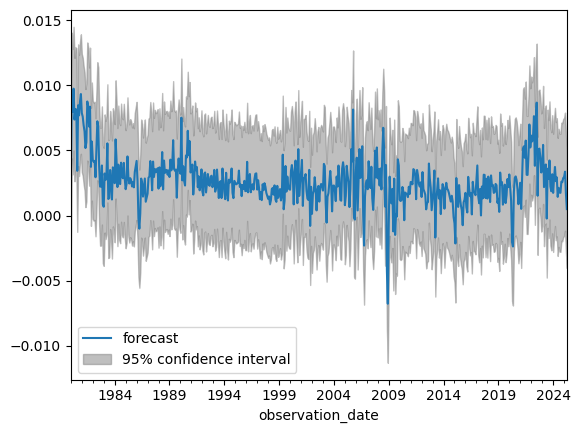

In [10]:
arma121model_plot = plot_predict(cpimodel)

In [40]:
forecast_df = pd.DataFrame(forecast.tvalues)
forecast_df = forecast_df.rename(columns={'tvalues': 'forecasts'})
forecast_df['Cumulative Sum'] = forecast_df['forecasts'].cumsum()

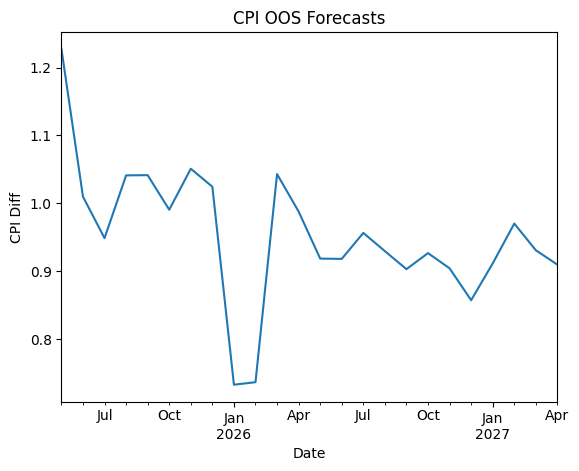

In [ ]:
#cumulativeforecast_plot = forecast_df['Cumulative Sum'].plot(title='CPI OOS Forecasts (Cumulative)', ylabel='CPI Diff', xlabel='Date')
forecast_plot = forecast_df['forecasts'].plot(title='CPI OOS Forecasts', ylabel='CPI Diff', xlabel='Date')